<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
data= pd.read_csv("34000.csv")

In [4]:
print(data.isnull().sum())

open     0
high     0
low      0
close    0
label    0
dtype: int64


In [5]:
data.describe()

,open,high,low,close,label
count,34274.000000,34274.000000,34274.000000,34274.000000,34274.000000
mean,1312.794151,1321.709182,1303.139738,1312.819940,0.504026
std,1294.894056,1303.198610,1285.868134,1294.875953,0.499991
min,96.640000,102.981947,86.000000,96.640000,0.000000
25%,199.952500,201.255000,198.425000,199.937500,0.000000
50%,603.865000,608.130000,597.485000,604.265000,1.000000
75%,2221.715000,2240.000000,2197.807500,2221.345000,1.000000
max,4848.240000,4868.480000,4835.270000,4848.240000,1.000000


In [8]:
correlation = np.corrcoef(data.open, data.close)
correlation

array([[1.        , 0.99990243],
       [0.99990243, 1.        ]])

In [9]:
correlation = np.corrcoef(data.open, data.high)
correlation

array([[1.        , 0.99995176],
       [0.99995176, 1.        ]])

In [51]:
x = np.array(data[["close", "open", "high", "low"]])
y = np.array(data[["label"]])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("RandomForestClassifier: ", metrics.accuracy_score(ytest, ypred))

RandomForestClassifier:  0.5096266044340724


In [27]:
from sklearn import svm
clf = svm.SVC()
clf.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [28]:
yhat= clf.predict(xtest)
print(yhat)

[1 0 1 ... 1 1 1]


In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("RandomForestClassifier: ", metrics.accuracy_score(ytest, yhat))

RandomForestClassifier:  0.48103850641773627


In [34]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver='liblinear').fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
y_hat= LR.predict(xtest)
print(y_hat)

[1 1 1 ... 1 1 1]


In [36]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("RandomForestClassifier: ", metrics.accuracy_score(ytest, y_hat))

RandomForestClassifier:  0.501458576429405


In [38]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh= KNeighborsClassifier(n_neighbors=k).fit(xtrain, ytrain)
neigh

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [39]:
y_pred= LR.predict(xtest)
print(y_pred)

[1 1 1 ... 1 1 1]


In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("RandomForestClassifier: ", metrics.accuracy_score(ytest, y_pred))

RandomForestClassifier:  0.501458576429405


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [71]:
model = Sequential()
model.add(Dense(16, input_shape=(x.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(x,
                    y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
2742/2742 [==============================] - 65s 3ms/step - loss: 2.4519 - accuracy: 0.4974 - val_loss: 0.8695 - val_accuracy: 0.5126
Epoch 2/80
2742/2742 [==============================] - 8s 3ms/step - loss: 0.7950 - accuracy: 0.5027 - val_loss: 0.7050 - val_accuracy: 0.4834
Epoch 3/80
2742/2742 [=========

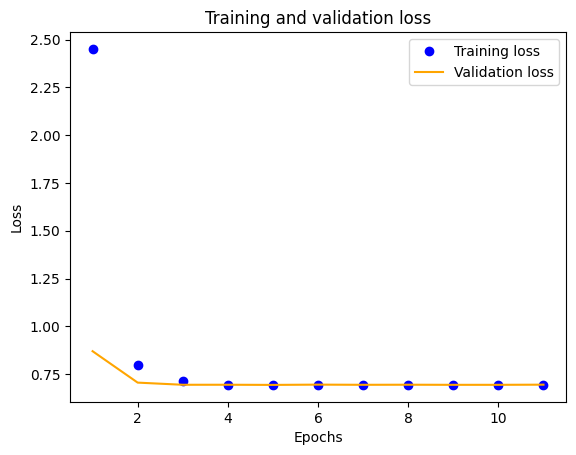

In [72]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1)

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 28, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_21 (Dense)            (None, 25)                1625      
                                                                 
 dense_22 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [88]:
correlation = data.corr()
print(correlation["close"].sort_values(ascending=False))

close    1.000000
high     0.999946
low      0.999930
open     0.999902
label   -0.001898
Name: close, dtype: float64


In [90]:
x = data[["open", "high", "low", "close"]]
y = data["label"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 4, 128)            66560     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_25 (Dense)            (None, 25)                1625      
                                                                 
 dense_26 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
27419/27419 [==============================] - 188s 7ms/step - loss: 0.2533
Epoch 2/30
27419/27419 [==============================] - 186s 7ms/step - loss: 0.2513
Epoch 3/30
27419/27419 [==============================] - 184s 7ms/step - loss: 0.2509
Epoch 4/30
27419/27419 [==============================] - 183s 7ms/step - loss: 0.2509
Epoch 5/30
27419/27419 [==============================] - 184s 7ms/step - loss: 0.2507
Epoch 6/30
27419/27419 [==============================] - 181s 7ms/step - loss: 0.2507
Epoch 7/30
27419/27419 [==============================] - 185s 7ms/step - loss: 0.2507
Epoch 8/30
27419/27419 [==============================] - 185s 7ms/step - loss: 0.2504
Epoch 9/30
27419/27419 [==============================] - 183s 7ms/step - loss: 0.2504
Epoch 10/30
27419/27419 [==============================] - 190s 7ms/step - loss: 0.2505
Epoch 11/30
27419/27419 [==============================] - 190s 7ms/step - loss: 0.2505
Epoch 12/30
27419/27419 [================

In [100]:
yhat= model.predict(xtest)
print(yhat)

215/215 [==============================] - 1s 5ms/step
[[0.5064409]
 [0.5064409]
 [0.5064409]
 ...
 [0.5064409]
 [0.5064409]
 [0.5064409]]


In [114]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc)

215/215 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4993
Test accuracy: 0.49934354424476624


In [99]:
import numpy as np
#features = [Open, High, Low, Close]
features = np.array([[177.089996, 180.419998, 177.070007, 145.090]])
model.predict(ytest)

215/215 [==============================] - 2s 2ms/step


array([[0.505797 ],
       [0.5058952],
       [0.505797 ],
       ...,
       [0.5058952],
       [0.505797 ],
       [0.505797 ]], dtype=float32)